# 1. 형태소 분석

In [1]:
# 1. 데이터 불러오기
import pandas as pd
data = pd.read_csv(r"/home/wanted-1/potenup-workspace/Project/project2/team5/(Data)/'music_data(Merge)'.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)
data.dropna(inplace=True)
data.head()

,title,artist,lyrics,release_date,likes
0,#0000FF,Siera,"Welcome to my world\n\nRed , Blue , Green\n\nM...",2024.12.31,0
1,"#RETURN(feat. 장건, Dysearth)",CYAN,how are you doing\n있잖아 그건 나를 falling\nI'm fall...,2024.10.16,23
2,#첫사랑,볼빨간사춘기,어릴 때 넌 키도 작고\n빼빼 말랐지 기억나\n난 knock 그런 니가\n괜히 맘에...,2018.01.10,129991
3,& The Baby Girl (Feat. SABINE) (Original Mix),George D.Blue,You and I and the baby girl\nWhat should we be...,2024.12.15,50
4,'u' (Feat. Vann),Wuno,baby 너만을 바라봐 나는 all day\n알려줘 너만의 private한 stor...,2024.08.26,21


In [9]:
# 2. 데이터 값 type 변환
data['lyrics'] = data['lyrics'].astype(str)
print(type(data['lyrics'][0]))
lyrics = data['lyrics'].tolist()

<class 'str'>


In [11]:
# 3. 데이터 전처리
## 3-1. 모듈 활성화
import re

## 3-2. 문자열 정규화
ly_re = []
for lyric in lyrics:
    if isinstance(lyric, str):
        clean_lyric = re.sub(r"[^0-9a-zA-Zㄱ-ㅎ가-힣\s+!]", "", lyric)
        ly_re.extend(clean_lyric.split('\n'))
## 3-3. 빈 문자열 제거
ly_re = [sentence for sentence in ly_re if sentence.strip()]

## - GPU 사용을 위한 설정 확인

In [12]:
# 머신러닝 모델 GPU 사용하기 - torch
## 1. GPU 사용 여부 확인
import torch

## GPU 사용 가능 여부 확인
print(torch.cuda.is_available())        # True라면 GPU 사용 가능
print(torch.cuda.device_count())        # 사용 가능한 GPU 개수 출력
print(torch.cuda.get_device_name(0))    # 첫 번째 GPU 이름 출력

# 2. 디바이스 설정 (GPU가 없으면 CPU 사용)
device = torch.device(0)
print(f"Using device: {device}")

True
2
NVIDIA GeForce RTX 4090
Using device: cuda:0


In [13]:
# 4. KoNLPy : 형태소 분석
from konlpy.tag import Komoran
from tqdm import tqdm
komoran = Komoran()
ly_data_pos = []

for sentence in tqdm(ly_re):
    if sentence.strip():
        ly_data_pos.extend(komoran.pos(sentence))

print(ly_data_pos[:10])

100%|██████████| 221093/221093 [17:45<00:00, 207.55it/s] 

[('Welcome', 'SL'), ('to', 'SL'), ('my', 'SL'), ('world', 'SL'), ('Red', 'SL'), ('Blue', 'SL'), ('Green', 'SL'), ('My', 'SL'), ('world', 'SL'), ('is', 'SL')]


## - 데이터 저장

In [15]:
pd.DataFrame(ly_data_pos).to_csv(r"/home/wanted-1/potenup-workspace/Project/project2/team5/(Data)/pos_data_250125(3).csv")
len(ly_data_pos)

In [16]:
# 5. KoNLPy : 품사 분류 및 단어 분류
pos_list = []
word_list = []

for word, pos in tqdm(ly_data_pos, desc="Processing POS and words"):
    if pos != 'SL':
        pos_list.append(pos)
        word_list.append(word)

Processing POS and words: 100%|██████████| 1494661/1494661 [00:02<00:00, 573461.70it/s] 


In [22]:
print(pos_list[:20])

['VV', 'EC', 'NP', 'JX', 'NP', 'JKO', 'NP', 'JX', 'NP', 'JKO', 'MM', 'NNG', 'JX', 'MAG', 'NP', 'JKO', 'NNP', 'NNG', 'JX', 'VA']


In [20]:
print(word_list[:10])

['있', '잖아', '그것', 'ㄴ', '나', '를', '너', '는', '나', '를']


In [ ]:
# 6. 분류 개수 확인하기
from collections import Counter
word_list_counter  = Counter(str(word_list))
print(len(word_list_counter))
pos_list_counter  = Counter(str(pos_list))
print(len(pos_list_counter))

1548
24


/tmp/ipykernel_893807/2322073335.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


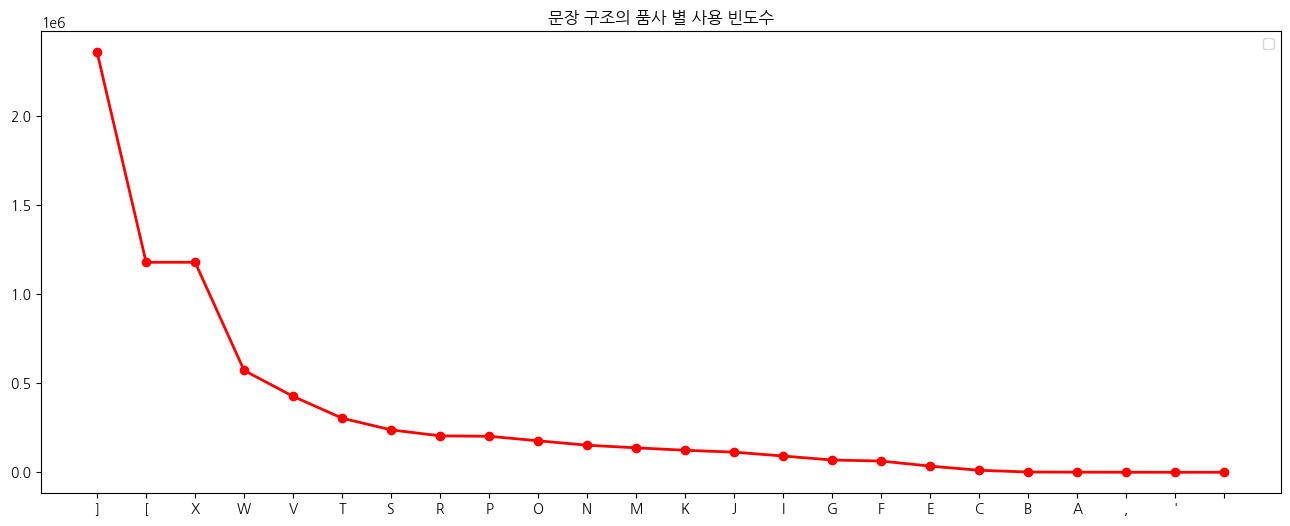

In [27]:
# 7. 문장 구조의 품사 별 사용 빈도수 그래프로 나타내기
import koreanize_matplotlib
import matplotlib.pyplot as plt

x = sorted(pos_list_counter.keys(), reverse=True)
y = sorted(pos_list_counter.values(), reverse=True)

plt.figure(figsize=(16, 6))
plt.plot(x, y, color="red", linewidth=2, marker='o')
plt.title('문장 구조의 품사 별 사용 빈도수')
plt.legend()
plt.show()

In [29]:
# 8. 품사 별 단어 모음 변수 만들기
## 각 품사에 따른 리스트 생성
NNG, JX, VV, EC, JKS, VA, EF, MAG, JKO, JC = [], [], [], [], [], [], [], [], [], []
JKB, MM, XSA, XSV, JKV, NA, VX, NP, VCN, NNB, XSN, VCP = [], [], [], [], [], [], [], [], [], [], [], []
ETN, XR, EP, NR, SN, XPN, IC, NNP, ETM, JKC, SF, SW, JKG = [], [], [], [], [], [], [], [], [], [], [], [], []
unknown_words = []

# 형태소 분석 결과를 기반으로 품사 분류
for word, pos in tqdm(ly_data_pos):
    match pos:
        case "NNG":
            NNG.append(word)
        case "JX":
            JX.append(word)
        case "VV":
            VV.append(word)
        case "EC":
            EC.append(word)
        case "JKS":
            JKS.append(word)
        case "VA":
            VA.append(word)
        case "EF":
            EF.append(word)
        case "MAG":
            MAG.append(word)
        case "JKO":
            JKO.append(word)
        case "JC":
            JC.append(word)
        case "JKB":
            JKB.append(word)
        case "MM":
            MM.append(word)
        case "XSA":
            XSA.append(word)
        case "XSV":
            XSV.append(word)
        case "JKV":
            JKV.append(word)
        case "NA":
            NA.append(word)
        case "VX":
            VX.append(word)
        case "NP":
            NP.append(word)
        case "VCN":
            VCN.append(word)
        case "NNB":
            NNB.append(word)
        case "XSN":
            XSN.append(word)
        case "VCP":
            VCP.append(word)
        case "ETN":
            ETN.append(word)
        case "XR":
            XR.append(word)
        case "EP":
            EP.append(word)
        case "NR":
            NR.append(word)
        case "SN":
            SN.append(word)
        case "XPN":
            XPN.append(word)
        case "IC":
            IC.append(word)
        case "NNP":
            NNP.append(word)
        case "ETM":
            ETM.append(word)
        case "JKC":
            JKC.append(word)
        case "SF":
            SF.append(word)
        case "SW":
            SW.append(word)
        case "JKG":
            JKG.append(word)
        case _:
            unknown_words.append(word)  # 분류되지 않은 경우

100%|██████████| 1494661/1494661 [00:05<00:00, 298358.45it/s] 


In [30]:
print(len(unknown_words))

321357


# 2. 문장 생성하기

In [33]:
# 1. 모듈 불러오기
import random

# 2. 문장 생성 패턴
sentence1 = f"{random.choice(NNG)}{random.choice(JKS)} {random.choice(MAG)} {random.choice(VV)}{random.choice(EC)} {random.choice(NNG)}{random.choice(JKO)} {random.choice(VV)}{random.choice(EC)}"
sentence2 = f"{random.choice(NNG)}{random.choice(JKS)} {random.choice(NNG)}{random.choice(JKO)} {random.choice(VV)}{random.choice(EC)} {random.choice(MAG)} {random.choice(VA)}{random.choice(EC)}"
sentence3 = f"{random.choice(MAG)} {random.choice(VV)}{random.choice(EC)} {random.choice(NNG)}{random.choice(JKS)} {random.choice(VA)}{random.choice(EC)}"
sentence4 = f"{random.choice(NNG)}{random.choice(JKS)} {random.choice(VV)}{random.choice(EC)} {random.choice(NNG)}{random.choice(JKO)} {random.choice(MAG)} {random.choice(VV)}{random.choice(EC)}"
sentence5 = f"{random.choice(NNG)}{random.choice(JKS)} {random.choice(VV)}{random.choice(EC)} {random.choice(NNG)}{random.choice(JKO)} {random.choice(MAG)} {random.choice(VA)}{random.choice(EC)}"
sentences = [
    sentence1,
    sentence2,
    sentence3,
    sentence4,
    sentence5,
]

# 결과 출력
for i, sentence in enumerate(sentences, 1):
    print(f"Sentence {i}: {sentence}")

Sentence 1: 탓가 아직 하다면 때를 맞게
Sentence 2: 게가 귀을 잊히어 좀 늦지만
Sentence 3: 바짝 넘치어 부족가 차갑게
Sentence 4: 이상이 외치아 사랑ㄹ 매일 오아도
Sentence 5: 준비가 떨어지어 전을 더 괜찮면
